In [59]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.linear_model as linear_model
from sklearn.linear_model import Lasso
from scipy import stats
from xgboost import XGBRegressor # 부스팅-XGBoost회귀
from lightgbm import LGBMRegressor # 부스팅-LightGBM 회귀
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [60]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 1. EDA

In [120]:
train = pd.read_csv('./train.csv')

In [121]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
train.drop("Id", axis = 1, inplace = True)

In [124]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 독립변수, 종속변수 정리

- Feature (X, 독립 변수)

    - MSSubClass: The building class
    - MSZoning: The general zoning classification
    - LotFrontage: Linear feet of street connected to property
    - LotArea: Lot size in square feet
    - Street: Type of road access
    - Alley: Type of alley access
    - LotShape: General shape of property
    - LandContour: Flatness of the property
    - Utilities: Type of utilities available
    - LotConfig: Lot configuration
    - LandSlope: Slope of property
    - Neighborhood: Physical locations within Ames city limits
    - Condition1: Proximity to main road or railroad
    - Condition2: Proximity to main road or railroad (if a second is present)
    - BldgType: Type of dwelling
    - HouseStyle: Style of dwelling
    - OverallQual: Overall material and finish quality
    - OverallCond: Overall condition rating
    - YearBuilt: Original construction date
    - YearRemodAdd: Remodel date
    - RoofStyle: Type of roof
    - RoofMatl: Roof material
    - Exterior1st: Exterior covering on house
    - Exterior2nd: Exterior covering on house (if more than one material)
    - MasVnrType: Masonry veneer type
    - MasVnrArea: Masonry veneer area in square feet
    - ExterQual: Exterior material quality
    - ExterCond: Present condition of the material on the exterior
    - Foundation: Type of foundation
    - BsmtQual: Height of the basement
    - BsmtCond: General condition of the basement
    - BsmtExposure: Walkout or garden level basement walls
    - BsmtFinType1: Quality of basement finished area
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinType2: Quality of second finished area (if present)
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area
    - TotalBsmtSF: Total square feet of basement area
    - Heating: Type of heating
    - HeatingQC: Heating quality and condition
    - CentralAir: Central air conditioning
    - Electrical: Electrical system
    - 1stFlrSF: First Floor square feet
    - 2ndFlrSF: Second floor square feet
    - LowQualFinSF: Low quality finished square feet (all floors)
    - GrLivArea: Above grade (ground) living area square feet
    - BsmtFullBath: Basement full bathrooms
    - BsmtHalfBath: Basement half bathrooms
    - FullBath: Full bathrooms above grade
    - HalfBath: Half baths above grade
    - Bedroom: Number of bedrooms above basement level
    - Kitchen: Number of kitchens
    - KitchenQual: Kitchen quality
    - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    - Functional: Home functionality rating
    - Fireplaces: Number of fireplaces
    - FireplaceQu: Fireplace quality
    - GarageType: Garage location
    - GarageYrBlt: Year garage was built
    - GarageFinish: Interior finish of the garage
    - GarageCars: Size of garage in car capacity
    - GarageArea: Size of garage in square feet
    - GarageQual: Garage quality
    - GarageCond: Garage condition
    - PavedDrive: Paved driveway
    - WoodDeckSF: Wood deck area in square feet
    - OpenPorchSF: Open porch area in square feet
    - EnclosedPorch: Enclosed porch area in square feet
    - 3SsnPorch: Three season porch area in square feet
    - ScreenPorch: Screen porch area in square feet
    - PoolArea: Pool area in square feet
    - PoolQC: Pool quality
    - Fence: Fence quality
    - MiscFeature: Miscellaneous feature not covered in other categories
    - MiscVal: $Value of miscellaneous feature
    - MoSold: Month Sold
    - YrSold: Year Sold
    - SaleType: Type of sale
    - SaleCondition: Condition of sale

    

- Target(y, 종속변수)
    - SalePrice

# 2. 데이터 전처리

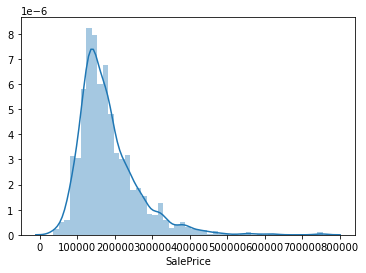

In [125]:
# 시각화후 로그정규화 할 것.

sns.distplot(train['SalePrice']);

In [126]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Value Ratio' :train_na})
missing_data.head(20)

,Missing Value Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Ratio of missing values')

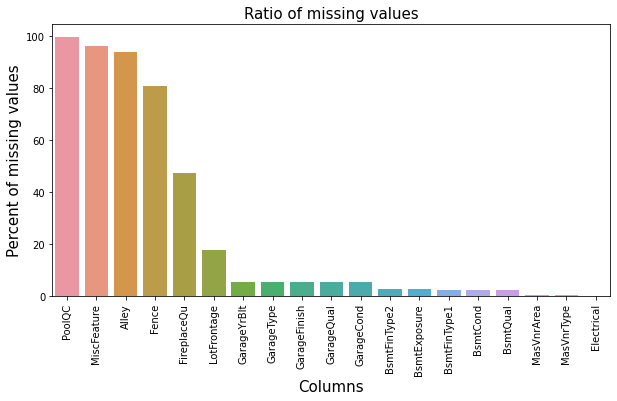

In [127]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Ratio of missing values', fontsize=15)

## 2-1. PoolQC

In [128]:
#according to dic, Nan value of the pool means no pool in the house
train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [129]:
train["PoolQC"] = train["PoolQC"].fillna("None")

In [130]:
train["PoolQC"].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

## 2-2. MiscFeature

In [131]:
# according to dic, Nan value of the Miscfeature means no Miscellaneous feature in the house

train["MiscFeature"].value_counts()
train["MiscFeature"] = train["MiscFeature"].fillna("None")

In [132]:
train["MiscFeature"].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

## 2-3. Alley

In [133]:
# according to dic, Nan value of the Alley means no Alley access in the house

train["Alley"].value_counts()
train["Alley"] = train["Alley"].fillna("None")

In [134]:
train["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

## 2-4. Fence

In [135]:
# according to dic, Nan value of the Fence means no Fence in the house 

train["Fence"].value_counts()
train["Fence"] = train["Fence"].fillna("None")
train["Fence"].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [136]:
train["Fence"].value_counts().sum()

1460

## 2-5. FireplaceQu

In [137]:
# according to dic, Nan value of the FireplaceQuality means no Fireplace in the house

train["FireplaceQu"].value_counts()
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

In [138]:
train["FireplaceQu"].value_counts().sum()

1460

## 2-6. LotFrontage

In [139]:
#LotFrontage: Linear feet of street connected to property
#fill with mean of LotFrontage

train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [140]:
train["LotFrontage"].fillna(70, inplace=True)
train["LotFrontage"].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

## 2-7. Garage 

 - GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [141]:
#GarageYrBlt: Year garage was built

train[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.0,Attchd,2,548,TA,TA,RFn
1,1976.0,Attchd,2,460,TA,TA,RFn
2,2001.0,Attchd,2,608,TA,TA,RFn
3,1998.0,Detchd,3,642,TA,TA,Unf
4,2000.0,Attchd,3,836,TA,TA,RFn


In [142]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna("None")
train['GarageType'] = train['GarageType'].fillna("None")
train['GarageQual'] = train['GarageQual'].fillna("None")
train['GarageCond'] = train['GarageCond'].fillna("None")
train['GarageFinish'] = train['GarageFinish'].fillna("None")
train['GarageCars'] = train['GarageCars'].fillna(0)
train['GarageArea'] = train['GarageArea'].fillna(0)

In [143]:
train[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003,Attchd,2,548,TA,TA,RFn
1,1976,Attchd,2,460,TA,TA,RFn
2,2001,Attchd,2,608,TA,TA,RFn
3,1998,Detchd,3,642,TA,TA,Unf
4,2000,Attchd,3,836,TA,TA,RFn


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2-8. BsmtFin
   - BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [145]:
#check null values..
train[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,Unf,No,GLQ,TA,Gd,1,0,856,706,0,150
1,Unf,Gd,ALQ,TA,Gd,0,1,1262,978,0,284
2,Unf,Mn,GLQ,TA,Gd,1,0,920,486,0,434
3,Unf,No,ALQ,Gd,TA,1,0,756,216,0,540
4,Unf,Av,GLQ,TA,Gd,1,0,1145,655,0,490
5,Unf,No,GLQ,TA,Gd,1,0,796,732,0,64
6,Unf,Av,GLQ,TA,Ex,1,0,1686,1369,0,317
7,BLQ,Mn,ALQ,TA,Gd,1,0,1107,859,32,216
8,Unf,No,Unf,TA,TA,0,0,952,0,0,952
9,Unf,No,GLQ,TA,TA,1,0,991,851,0,140


In [146]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna("None")
train['BsmtExposure'] = train['BsmtExposure'].fillna("None")
train['BsmtFinType1'] = train['BsmtFinType1'].fillna("None")
train['BsmtCond'] = train['BsmtCond'].fillna("None")
train['BsmtQual'] = train['BsmtQual'].fillna("None")
train['BsmtFullBath'] = train['BsmtFullBath'].fillna(0)
train['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(0)
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(0)
train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(0)
train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(0)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2-9. MasVnrArea, MasVnrType

In [148]:
# 0 MasVnrArea means no Masonry veneer

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['MasVnrType'] = train['MasVnrType'].fillna("None")

In [149]:
train['MasVnrArea'].value_counts().sum()

1460

In [150]:
train['MasVnrType'].value_counts().sum()

1460

## 2-10. Electrical

In [151]:
train['Electrical'].value_counts().sum()

1459

In [152]:
train['Electrical'] = train['Electrical'].fillna("SBrkr")
train['Electrical'].value_counts().sum()

1460

In [153]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Value Ratio' :train_na})
missing_data.head(20)

,Missing Value Ratio


## 2-11. Utilities(drop)

In [154]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [155]:
train.drop('Utilities', axis=1, inplace=True)

# 3. 데이터 시각화

## 3-1. YearBuilt vs (SalePrice, OverallQual)

Text(0, 0.5, 'OverallQual')

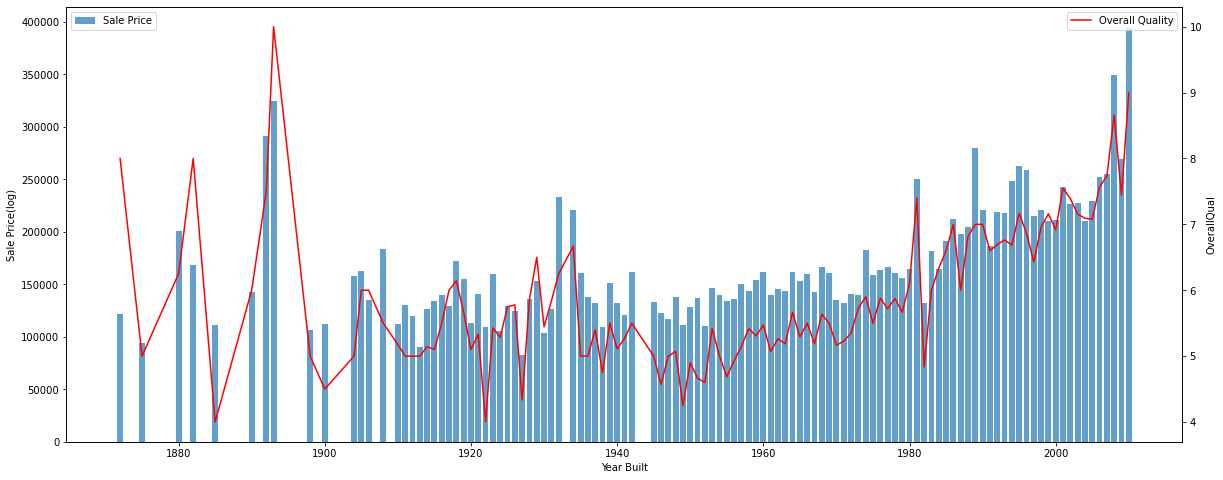

In [95]:
meanprices = train[['YearBuilt','SalePrice']].groupby('YearBuilt').mean()
meanquals = train[['YearBuilt','OverallQual']].groupby('YearBuilt').mean()
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(meanprices.index, meanprices['SalePrice'], label='Sale Price', alpha=0.7)
ax2=ax.twinx()
ax2.plot(meanquals, label='Overall Quality', c='r')
ax2.legend()
ax.legend()
ax.set_xlabel('Year Built')
ax.set_ylabel('Sale Price(log)')
ax2.set_ylabel('OverallQual')

## 3-2. GrLivArea vs SalePrice

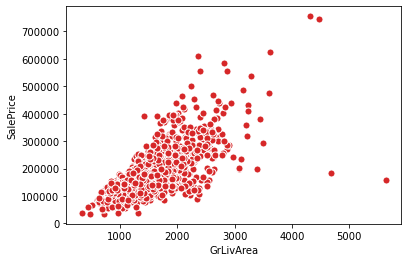

In [99]:
train[['SalePrice', 'GrLivArea']].plot.scatter(x='GrLivArea', y='SalePrice', c='tab:red', edgecolor='w', s=50)

## 3-3. Categorical Data Plots

In [100]:
# 변수타입이 object인 것 추출

ca_features = train.dtypes[train.dtypes == "object"].index
ca_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [101]:
qualitative = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


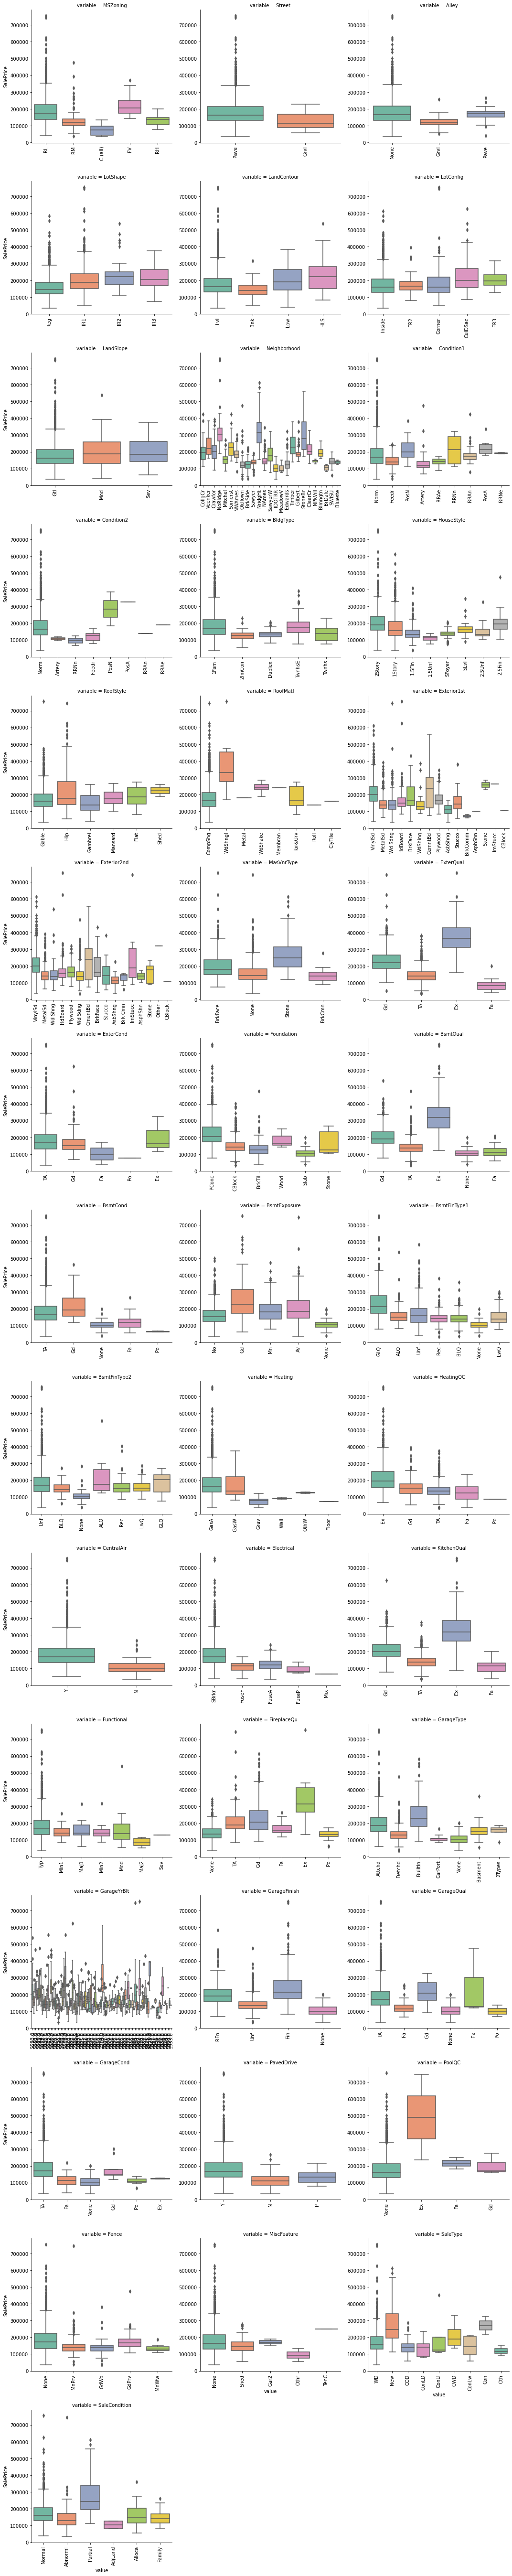

In [103]:
d2=pd.melt(train, id_vars='SalePrice', value_vars=qualitative)
g2=sns.FacetGrid(d2, col_wrap=3, col='variable', sharex=False, sharey=False, height=5)
g=g2.map(sns.boxplot, 'value', 'SalePrice', palette="Set2")
for ax in g2.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.tight_layout()

## 3-4. Facet Grid Plot - FirePlace QC vs.SalePrice

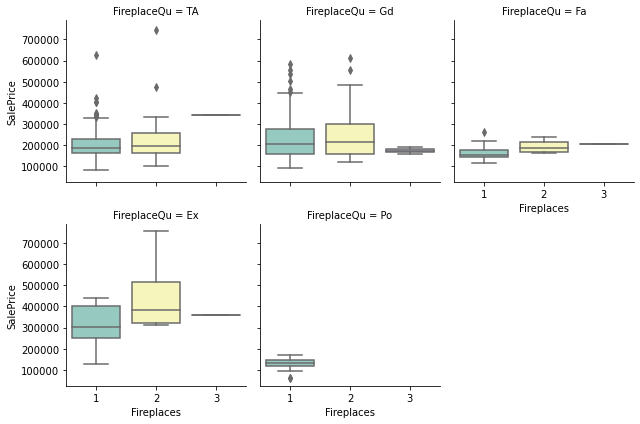

In [106]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=train.FireplaceQu.unique()[1:]) 

g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set3')

## 3-5. Numerical variable vs SalePrice

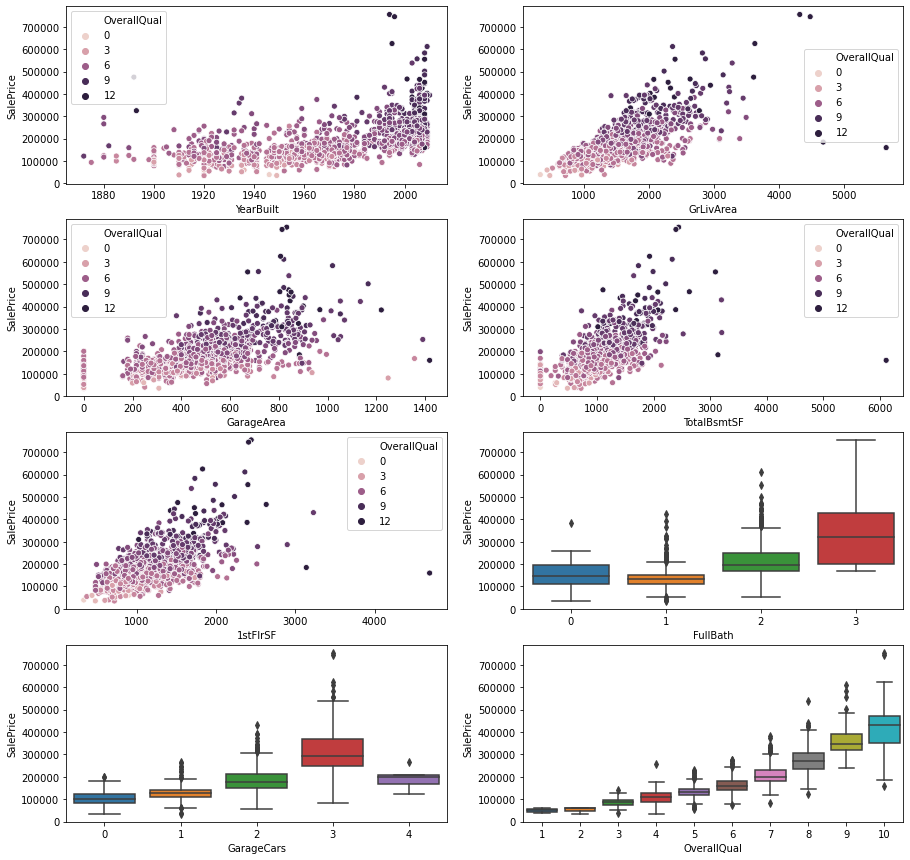

In [107]:
f, axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False)
ax = sns.scatterplot(x="YearBuilt", y="SalePrice", data=train, hue="OverallQual", ax = axes[0, 0])
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=train, hue="OverallQual", ax = axes[0, 1])
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=train, hue="OverallQual", ax = axes[1, 0])
ax = sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train, hue="OverallQual", ax = axes[1, 1])
ax = sns.scatterplot(x="1stFlrSF", y="SalePrice", data=train, hue="OverallQual", ax = axes[2, 0])
ax = sns.boxplot(x="FullBath", y="SalePrice", data=train, ax=axes[2, 1])
ax = sns.boxplot(x="GarageCars", y="SalePrice", data=train, ax=axes[3, 0])
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train, ax=axes[3, 1])

## 3-6. Numerical variable distplot

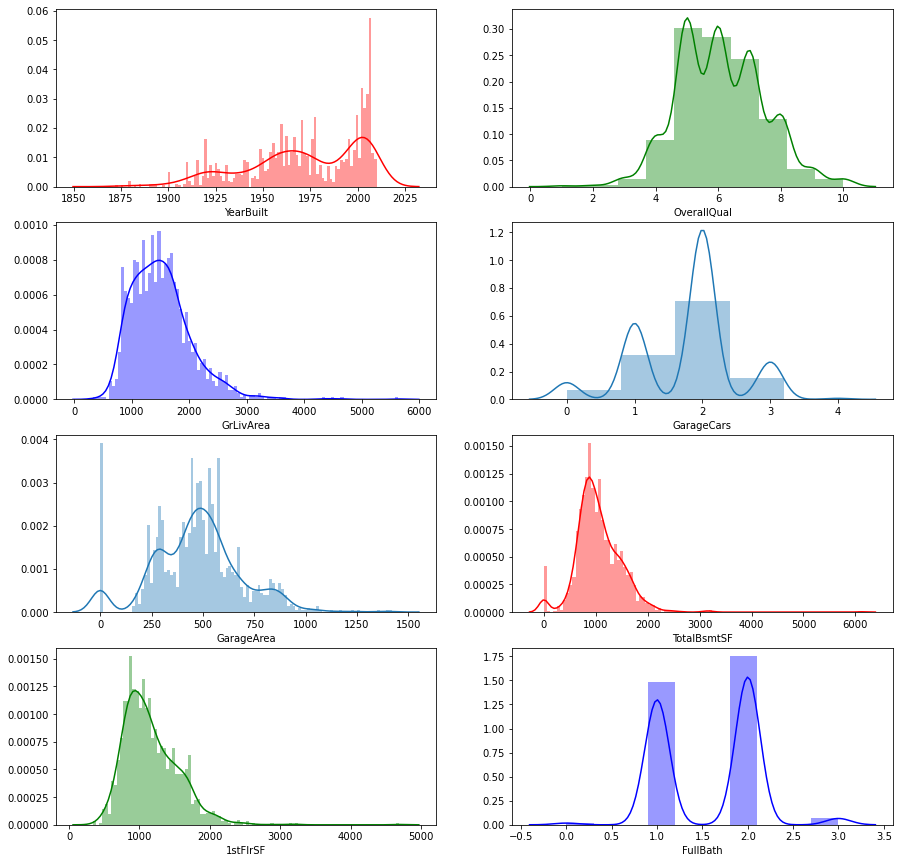

In [108]:
f, axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False)
ax = sns.distplot(train["YearBuilt"], bins=100, ax = axes[0, 0], color='r')
ax = sns.distplot(train["OverallQual"], bins=10, ax = axes[0, 1], color='g')
ax = sns.distplot(train["GrLivArea"], bins=100, ax = axes[1, 0], color='b')
ax = sns.distplot(train["GarageCars"], bins=5, ax = axes[1, 1])
ax = sns.distplot(train["GarageArea"], bins=100, ax = axes[2, 0])
ax = sns.distplot(train["TotalBsmtSF"], bins=100, ax = axes[2, 1], color='r')
ax = sns.distplot(train["1stFlrSF"], bins=100, ax = axes[3, 0], color='g')
ax = sns.distplot(train["FullBath"], bins=10, ax = axes[3, 1], color='b')

## 3-7. target variable log transformation 

In [109]:
train['SalePrice']=np.log1p(train['SalePrice'])

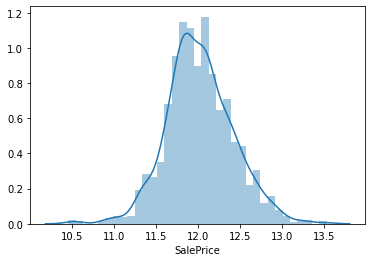

In [110]:
sns.distplot(train['SalePrice']);

# 4. 모델링

In [156]:
ca_features = train.dtypes[train.dtypes == "object"].index
ca_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [166]:
from sklearn.preprocessing import LabelEncoder

cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition']

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape train datasets: {}'.format(train.shape))

Shape train datasets: (1460, 79)


In [167]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,89,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,62,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,87,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,86,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [170]:
train['LotFrontage'].astype(int)

0       65
1       80
2       68
3       60
4       84
        ..
1455    62
1456    85
1457    66
1458    68
1459    75
Name: LotFrontage, Length: 1460, dtype: int32

In [171]:
y = train['SalePrice']
y.shape

(1460,)

In [172]:
X = train.drop('SalePrice', axis=1)
X.shape

(1460, 78)

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [174]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 78)
(292, 78)
(1168,)
(292,)


In [175]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits = 10, shuffle=True)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2, n_jobs=-1)
    score = [r2_val_score.mean()]
    return score

In [176]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    return np.sqrt(cv_scores)

### Lasso회귀를 이용하여 유의미한 변수파악

In [177]:
## Tuning parameters

param_grid = {'alpha':[0.0001,0.001,0.01,1.,5.,10.,25.],'max_iter':[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Home in
param_grid = {'alpha':[x/100. * alpha for x in range(50,150,5)],'max_iter':[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:,.5f}| alpha {:,.5f}'.format(rsme(lasso, X_train, y_train).mean(),alpha))

Lasso -> Train RSME: 37,831.97125| alpha 0.00005


In [178]:
dfColumns = X_train.columns

Lasso dropped 0 of 78 features.


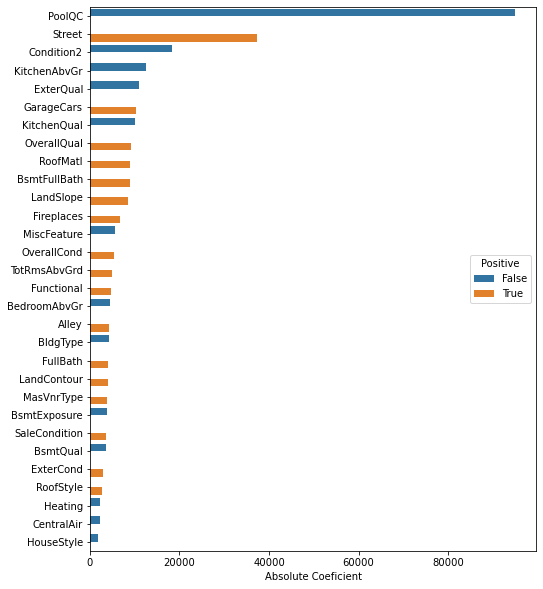

In [180]:
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_>0}, index=dfColumns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Lasso dropped {} of {} features.'.format(sum(coefs.coefs==0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30) # 상위 30개 유의미한 변수
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title=('Lasso Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

In [181]:
# 상위 30개 유의미한 변수

top_coefs

,coefs,Positive,coefs_abs
PoolQC,-94966.020233,False,94966.020233
Street,37205.888955,True,37205.888955
Condition2,-18372.702928,False,18372.702928
KitchenAbvGr,-12438.736376,False,12438.736376
ExterQual,-10951.626087,False,10951.626087
GarageCars,10393.022570,True,10393.022570
KitchenQual,-9966.894964,False,9966.894964
OverallQual,9218.727854,True,9218.727854
RoofMatl,8940.655632,True,8940.655632
BsmtFullBath,8904.064573,True,8904.064573


In [182]:
# Linear Regression

LR = linear_model.LinearRegression(n_jobs=-1)
acc_LR = test_model(LR, X_train, y_train)

LR_rsme = rsme(LR, X_train, y_train)

print('Score: {:.5f}'.format((acc_LR[0])))
print('RSME: {:.5f}'.format(LR_rsme.mean()))

Score: 0.74346
RSME: 37831.97116


In [183]:
# Support Vector Regressor

svr_reg = SVR(kernel='rbf')
acc_SVR = test_model(svr_reg, X_train, y_train)

svr_rsme = rsme(svr_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_SVR[0])))
print('RSME: {:.5f}'.format(svr_rsme.mean()))

Score: -0.05877
RSME: 81720.02997


In [184]:
#Decision Tree
dt_reg = DecisionTreeRegressor(random_state=21)
acc_tree = test_model(dt_reg, X_train, y_train)

dt_rsme = rsme(dt_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_tree[0])))
print('RSME: {:.5f}'.format(dt_rsme.mean()))

Score: 0.66751
RSME: 41042.67639


In [185]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators = 1000, n_jobs=-1)
acc_rf = test_model(rf_reg, X_train, y_train)

rf_rsme = rsme(rf_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_rf[0])))
print('RSME: {:.5f}'.format(rf_rsme.mean()))

Score: 0.85467
RSME: 30396.59165


In [186]:
# Bagging Regressor
br_reg = BaggingRegressor(n_estimators=1000, n_jobs=-1)
acc_br = test_model(br_reg, X_train, y_train)

br_rsme = rsme(br_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_br[0])))
print('RSME: {:.5f}'.format(br_rsme.mean()))

Score: 0.85605
RSME: 30208.81700


In [187]:
# Gradient Boosting Regressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, loss='ls')
acc_gbr = test_model(gbr_reg, X_train, y_train)

gbr_rsme = rsme(gbr_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_gbr[0])))
print('RSME: {:.5f}'.format(gbr_rsme.mean()))

Score: 0.85900
RSME: 27368.32472


In [191]:
# XGBoost

xgb_reg = xgb.XGBRegressor()

acc_xgb = test_model(xgb_reg, X_train, y_train)
xgb_rsme = rsme(xgb_reg, X_train, y_train)

print('Score: {:.5f}'.format((acc_xgb[0])))
print('RSME: {:.5f}'.format(xgb_rsme.mean()))

Score: 0.82822
RSME: 30186.50557


In [192]:
# Ligth GBM

lgb_reg = LGBMRegressor()

acc_lgb = test_model(lgb_reg, X_train, y_train)
lgb_rsme = rsme(lgb_reg, X_train, y_train)

print('Score: {:.5f}'.format((acc_lgb[0])))
print('RSME: {:.5f}'.format(lgb_rsme.mean()))

Score: 0.86662
RSME: 28918.77589


In [194]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 
              'Decision Tree', 'Random Forest', 'Bagging Regressor', 'Gradient Boosting Regressor ','XGBoost','Light GBM'],
    'Score': [acc_LR[0], acc_SVR[0], acc_tree[0], acc_rf[0], acc_br[0], acc_gbr[0], acc_xgb[0], acc_lgb[0]],
    'RMSE': [LR_rsme.mean(), svr_rsme.mean(), dt_rsme.mean(), rf_rsme.mean(), br_rsme.mean(), gbr_rsme.mean(), 
             xgb_rsme.mean(), lgb_rsme.mean()],
    'RMSE_std':[LR_rsme.std(), svr_rsme.std(), dt_rsme.std(), rf_rsme.std(), br_rsme.std(), gbr_rsme.std(), 
                xgb_rsme.std(), lgb_rsme.std()]
})

result = results.sort_values(by='RMSE', ascending=True)
result = result.set_index('Model')
display(result.head(9))

,Score,RMSE,RMSE_std
Model,,,
Gradient Boosting Regressor,0.859000,27368.324724,7882.384532
Light GBM,0.866620,28918.775894,7089.524728
XGBoost,0.828224,30186.505575,6972.542884
Bagging Regressor,0.856050,30208.817000,7186.095196
Random Forest,0.854667,30396.591650,7316.641645
Linear Regression,0.743458,37831.971156,12526.525090
Decision Tree,0.667506,41042.676387,6828.257328
Support Vector Regressor,-0.058768,81720.029967,10361.534220


# 5. 하이퍼파라미터 튜닝

## 5-1. 랜덤 포레스트 (RandomizedSearchCV)

In [196]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [197]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [201]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=400)

In [208]:
rf_best = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=400, n_jobs=-1)

In [209]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=400, n_jobs=-1)

In [210]:
acc_rf_best = test_model(rf_best, X_train, y_train)
rf_best_rsme = rsme(rf_best, X_train, y_train)

print('Score: {:.5f}'.format((acc_rf_best[0])))
print('RSME: {:.5f}'.format(rf_best_rsme.mean()))
print('RSME_std: {:.5f}'.format(rf_best_rsme.std()))

Score: 0.86498
RSME: 28856.29791
RSME_std: 6500.10827


## 5-2. Light GBM(RandomizedSearchCV)

In [198]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 120, num = 20)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [3,6,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [ 1, 3, 6, 9 ]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [199]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


LGBMRegressor(bootstrap=False, max_depth=10, max_features='auto',
              min_samples_leaf=3, min_samples_split=3, n_estimators=1980)


In [200]:
lg_random.best_estimator_

LGBMRegressor(bootstrap=False, max_depth=10, max_features='auto',
              min_samples_leaf=3, min_samples_split=3, n_estimators=1980)

In [211]:
lg_random_best = LGBMRegressor(bootstrap=False, max_depth=10, max_features='auto',
              min_samples_leaf=3, min_samples_split=3, n_estimators=1980)

In [212]:
acc_lg_random_best = test_model(lg_random_best, X_train, y_train)
lg_random_best_rsme = rsme(lg_random_best, X_train, y_train)

print('Score: {:.5f}'.format((acc_lg_random_best[0])))
print('RSME: {:.5f}'.format(lg_random_best_rsme.mean()))
print('RSME_std: {:.5f}'.format(lg_random_best_rsme.std()))

Score: 0.85286
RSME: 28889.35413
RSME_std: 6320.36953


## 5-3. Light GBM(Bayesian optimization)

In [202]:
bayes_params = {
    'num_leaves': (4, 99),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 128),
    'reg_alpha': (0, 0.9),
    'reg_lambda': (0, 0.9), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(1, 99)
}

In [203]:
from sklearn.metrics import mean_squared_error

def lgb_rmse_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":500,
        "learning_rate":0.05,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMRegressor(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="rmse", verbose=10)
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    
    y_preds = lgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse) 

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
    print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
    print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
    return rmse
    
    

In [204]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_rmse_eval, bayes_params)

In [205]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 500, 'learning_rate': 0.05, 'num_leaves': 53, 'colsample_bytree': 0.9831010231900574, 'subsample': 0.6779600380244493, 'max_depth': 37, 'reg_alpha': 0.23270134205759543, 'reg_lambda': 0.04046815905258423, 'min_split_gain': 0.007010220201317264, 'min_child_weight': 7.121953598872795, 'verbosity': -1}
[10]	valid_0's rmse: 52531.8	valid_0's l2: 2.75958e+09
[20]	valid_0's rmse: 39660.8	valid_0's l2: 1.57298e+09
[30]	valid_0's rmse: 33424.3	valid_0's l2: 1.11718e+09
[40]	valid_0's rmse: 29633.5	valid_0's l2: 8.78145e+08
[50]	valid_0's rmse: 27365.7	valid_0's l2: 7.48883e+08
[60]	valid_0's rmse: 26211.4	valid_0's l2: 6.87037e+08
[70]	valid_0's rmse: 25810.8	valid_0's l2: 6.66198e+08
[80]	valid_0's rmse: 25434.8	valid_0's l2: 6.4

params: {'n_estimator': 500, 'learning_rate': 0.05, 'num_leaves': 6, 'colsample_bytree': 0.5, 'subsample': 1.0, 'max_depth': 50, 'reg_alpha': 0.9, 'reg_lambda': 0.9, 'min_split_gain': 0.048605794426035666, 'min_child_weight': 58.71810871181895, 'verbosity': -1}
[10]	valid_0's rmse: 56518.8	valid_0's l2: 3.19437e+09
[20]	valid_0's rmse: 45124	valid_0's l2: 2.03618e+09
[30]	valid_0's rmse: 38308.1	valid_0's l2: 1.46751e+09
[40]	valid_0's rmse: 34005.9	valid_0's l2: 1.1564e+09
[50]	valid_0's rmse: 31438.9	valid_0's l2: 9.88403e+08
[60]	valid_0's rmse: 29845.4	valid_0's l2: 8.90747e+08
[70]	valid_0's rmse: 28748.3	valid_0's l2: 8.26467e+08
[80]	valid_0's rmse: 28034.1	valid_0's l2: 7.85911e+08
[90]	valid_0's rmse: 27524.6	valid_0's l2: 7.57603e+08
[100]	valid_0's rmse: 27110.8	valid_0's l2: 7.34998e+08
best_iter: None
MSE : 734997527.827 , RMSE : 27110.838
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.872
|  8        |  2.711e+0 |  0.5      |  50.4     |  58.72    |  0.0

In [206]:
BO_lgb.max

{'target': 29522.157206961674,
 'params': {'colsample_bytree': 0.5,
  'max_depth': 79.73672962433477,
  'min_child_weight': 99.0,
  'min_split_gain': 0.1,
  'num_leaves': 4.0,
  'reg_alpha': 0.0,
  'reg_lambda': 0.9,
  'subsample': 1.0}}

In [213]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMRegressor(n_estimators=1000, learning_rate=0.001, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, eval_metric="rmse", eval_set=evals, verbose=True)

# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다.

y_preds = lgbm_clf_bayes_best.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

[1]	valid_0's rmse: 75731.9	valid_0's l2: 5.73533e+09
[2]	valid_0's rmse: 75683.7	valid_0's l2: 5.72802e+09
[3]	valid_0's rmse: 75635.5	valid_0's l2: 5.72072e+09
[4]	valid_0's rmse: 75587.5	valid_0's l2: 5.71347e+09
[5]	valid_0's rmse: 75547.7	valid_0's l2: 5.70745e+09
[6]	valid_0's rmse: 75499.7	valid_0's l2: 5.7002e+09
[7]	valid_0's rmse: 75456.8	valid_0's l2: 5.69374e+09
[8]	valid_0's rmse: 75409.5	valid_0's l2: 5.68659e+09
[9]	valid_0's rmse: 75366.3	valid_0's l2: 5.68009e+09
[10]	valid_0's rmse: 75326.1	valid_0's l2: 5.67402e+09
[11]	valid_0's rmse: 75284.5	valid_0's l2: 5.66776e+09
[12]	valid_0's rmse: 75237	valid_0's l2: 5.6606e+09
[13]	valid_0's rmse: 75195.5	valid_0's l2: 5.65436e+09
[14]	valid_0's rmse: 75147.9	valid_0's l2: 5.6472e+09
[15]	valid_0's rmse: 75100.3	valid_0's l2: 5.64005e+09
[16]	valid_0's rmse: 75052.8	valid_0's l2: 5.63292e+09
[17]	valid_0's rmse: 75012.9	valid_0's l2: 5.62693e+09
[18]	valid_0's rmse: 74973	valid_0's l2: 5.62095e+09
[19]	valid_0's rmse: 74930

[411]	valid_0's rmse: 60967.1	valid_0's l2: 3.71698e+09
[412]	valid_0's rmse: 60936.4	valid_0's l2: 3.71324e+09
[413]	valid_0's rmse: 60905.5	valid_0's l2: 3.70947e+09
[414]	valid_0's rmse: 60875	valid_0's l2: 3.70576e+09
[415]	valid_0's rmse: 60844.4	valid_0's l2: 3.70204e+09
[416]	valid_0's rmse: 60814.2	valid_0's l2: 3.69837e+09
[417]	valid_0's rmse: 60783.8	valid_0's l2: 3.69467e+09
[418]	valid_0's rmse: 60753.2	valid_0's l2: 3.69096e+09
[419]	valid_0's rmse: 60722.5	valid_0's l2: 3.68722e+09
[420]	valid_0's rmse: 60692.3	valid_0's l2: 3.68355e+09
[421]	valid_0's rmse: 60661.8	valid_0's l2: 3.67985e+09
[422]	valid_0's rmse: 60633.8	valid_0's l2: 3.67645e+09
[423]	valid_0's rmse: 60603.5	valid_0's l2: 3.67279e+09
[424]	valid_0's rmse: 60577.9	valid_0's l2: 3.66969e+09
[425]	valid_0's rmse: 60549.6	valid_0's l2: 3.66625e+09
[426]	valid_0's rmse: 60519.1	valid_0's l2: 3.66256e+09
[427]	valid_0's rmse: 60492.5	valid_0's l2: 3.65934e+09
[428]	valid_0's rmse: 60466.8	valid_0's l2: 3.6562

[838]	valid_0's rmse: 50787.3	valid_0's l2: 2.57935e+09
[839]	valid_0's rmse: 50768.1	valid_0's l2: 2.5774e+09
[840]	valid_0's rmse: 50746.8	valid_0's l2: 2.57524e+09
[841]	valid_0's rmse: 50728	valid_0's l2: 2.57333e+09
[842]	valid_0's rmse: 50708.8	valid_0's l2: 2.57139e+09
[843]	valid_0's rmse: 50689	valid_0's l2: 2.56937e+09
[844]	valid_0's rmse: 50669	valid_0's l2: 2.56734e+09
[845]	valid_0's rmse: 50649.7	valid_0's l2: 2.5654e+09
[846]	valid_0's rmse: 50629.5	valid_0's l2: 2.56335e+09
[847]	valid_0's rmse: 50611	valid_0's l2: 2.56147e+09
[848]	valid_0's rmse: 50591.1	valid_0's l2: 2.55946e+09
[849]	valid_0's rmse: 50571.2	valid_0's l2: 2.55745e+09
[850]	valid_0's rmse: 50550.3	valid_0's l2: 2.55534e+09
[851]	valid_0's rmse: 50531.9	valid_0's l2: 2.55347e+09
[852]	valid_0's rmse: 50512.2	valid_0's l2: 2.55148e+09
[853]	valid_0's rmse: 50493.4	valid_0's l2: 2.54958e+09
[854]	valid_0's rmse: 50473.4	valid_0's l2: 2.54756e+09
[855]	valid_0's rmse: 50456.4	valid_0's l2: 2.54585e+09
[8

In [214]:
lgbm_clf_bayes_best

LGBMRegressor(colsample_bytree=0.5, learning_rate=0.001, max_depth=80,
              min_child_weight=99.0, min_split_gain=0.1, n_estimators=1000,
              num_leaves=4, reg_lambda=0.9)

In [215]:
acc_lgbm_clf_bayes_best = test_model(lgbm_clf_bayes_best, X_train, y_train)
lgbm_clf_bayes_best_rsme = rsme(lgbm_clf_bayes_best, X_train, y_train)

print('Score: {:.5f}'.format((acc_lgbm_clf_bayes_best[0])))
print('RSME: {:.5f}'.format(lgbm_clf_bayes_best_rsme.mean()))
print('RSME_std: {:.5f}'.format(lgbm_clf_bayes_best_rsme.std()))

Score: 0.57106
RSME: 52277.28605
RSME_std: 7844.43905


# END